In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load merge CSV file
df = pd.read_csv("Merge_file.csv")

df.head()

,coin,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   price       1000 non-null   float64
 2   1h          993 non-null    float64
 3   24h         993 non-null    float64
 4   7d          992 non-null    float64
 5   24h_volume  993 non-null    float64
 6   mkt_cap     1000 non-null   float64
 7   date        1000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 62.6+ KB


In [47]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


In [48]:
# Here we can not use mean or median as missing value treatment as the value of any crypto is assosiate with that only coin.
#we will drop the null value and also drop that crypto coin which does not have any data to predict its liquidity
df = df.dropna()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        992 non-null    object 
 1   price       992 non-null    float64
 2   1h          992 non-null    float64
 3   24h         992 non-null    float64
 4   7d          992 non-null    float64
 5   24h_volume  992 non-null    float64
 6   mkt_cap     992 non-null    float64
 7   date        992 non-null    object 
dtypes: float64(6), object(2)
memory usage: 69.8+ KB


In [50]:
df = df.sort_values('coin')

<function matplotlib.pyplot.show(close=None, block=None)>

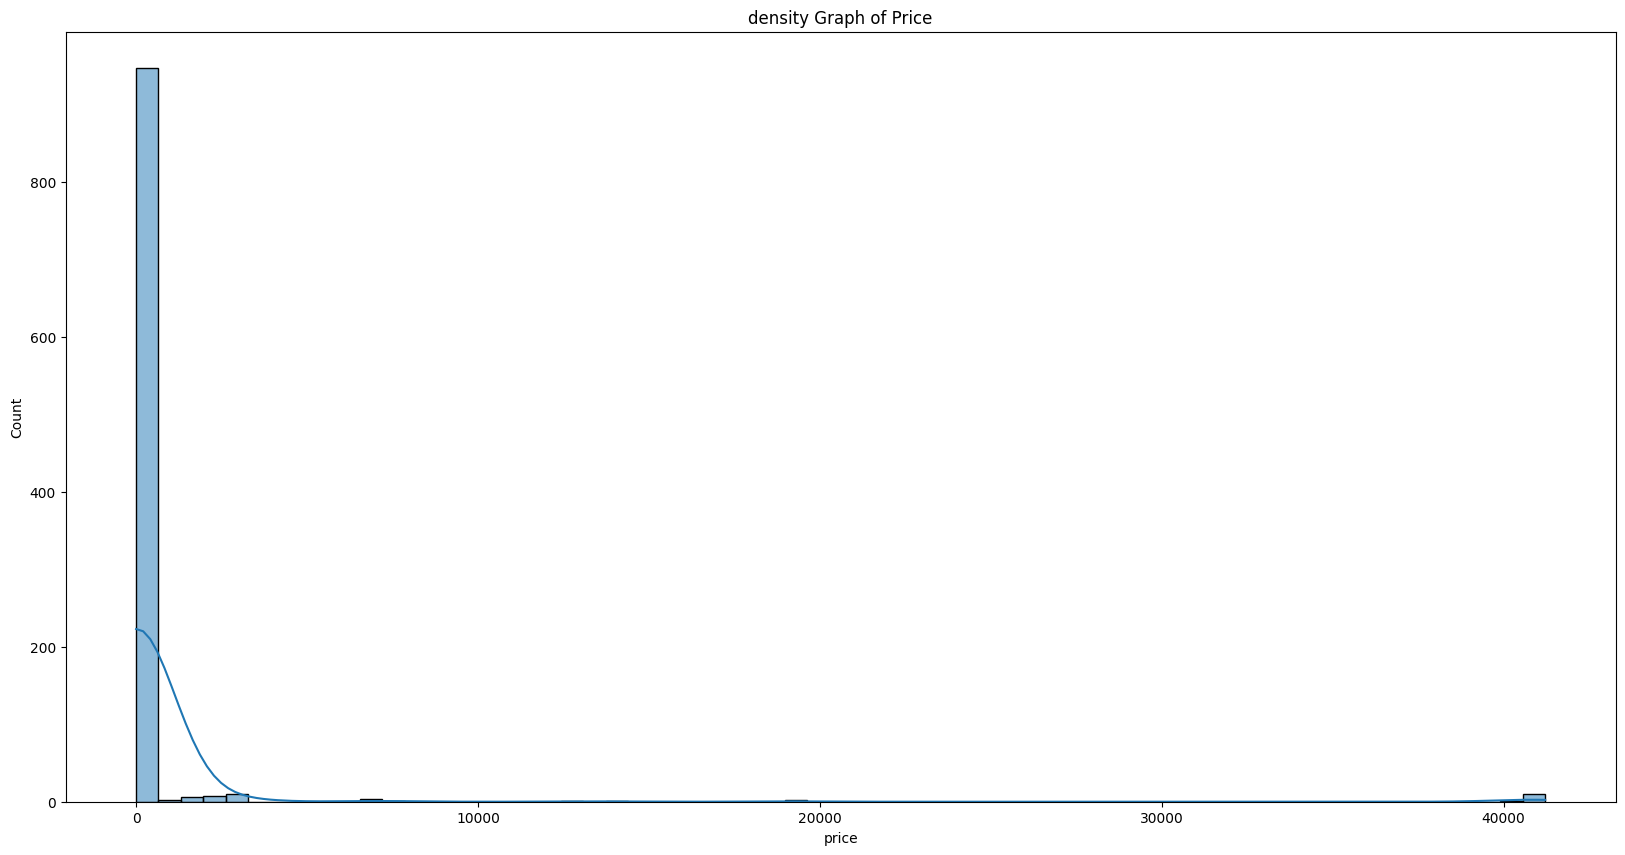

In [51]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='price', kde=True)
plt.title('density Graph of Price')
plt.show

The Price collumn is Right skewed. And most of the cryptocoins's Price is near to Zero. Also some crypto's Price is very high but we can not consider them as a outlier because it is an individual currency price and we required all the cruypto data so we can not do outlier treatment

<function matplotlib.pyplot.show(close=None, block=None)>

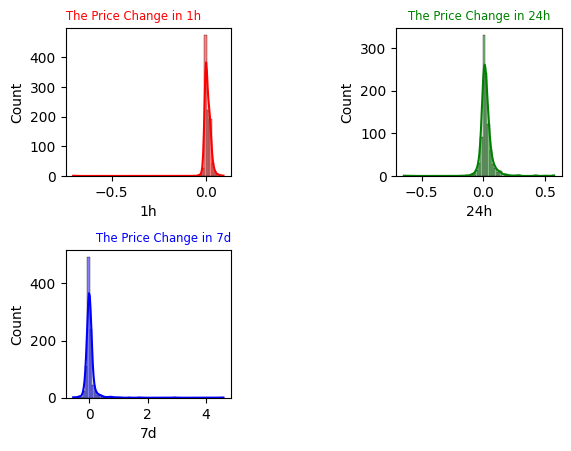

In [52]:
plt.Figure(figsize=(5,12))

plt.subplot(2,2,1)
sns.histplot(data=df, x='1h', kde=True, color='red')
plt.title('The Price Change in 1h', loc='left', fontsize='small', color='red')

plt.subplot(2,2,2)
sns.histplot(data=df, x='24h', kde=True, color='green')
plt.title('The Price Change in 24h', loc='center', fontsize='small', color='green')

plt.subplot(2,2,3)
sns.histplot(data=df, x='7d', kde=True, color='blue')
plt.title('The Price Change in 7d', loc='right', fontsize='small', color='blue')

plt.subplots_adjust(wspace=1, hspace=0.5)
plt.show

As we observe here every graph is almost normaly destributed. Also there is not much diffference between 7 days price chage of 16th and 17th date. Also there is some data which has high change in 7 days graph which has high of low liquidity. 

<function matplotlib.pyplot.show(close=None, block=None)>

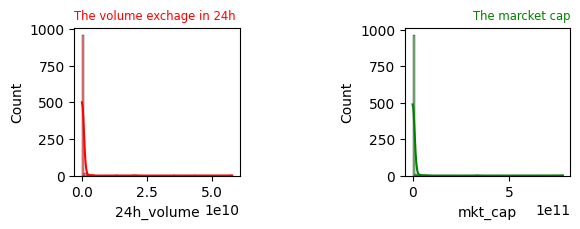

In [53]:
plt.Figure(figsize=(12,5))

plt.subplot(2,2,1)
sns.histplot(data=df, x='24h_volume', kde=True, color='red')
plt.title('The volume exchage in 24h', loc='left', fontsize='small', color='red')

plt.subplot(2,2,2)
sns.histplot(data=df, x='mkt_cap', kde=True, color='green')
plt.title('The marcket cap', loc='right', fontsize='small', color='green')

plt.subplots_adjust(wspace=1, hspace=0.5)
plt.show

This graph are also right skewed. and ther are mostly aroung the zero. Volume exchange is near to zero shows less liquidity.

Now we will do bivariant analysis
we will plot the below graph to observe the behaviour of the features.
- 24h_Volume VS 24h price change
- mkt_cap VS 24h_Volume
- price VS 24h_Volume
- price VS mkt_cap

In [54]:
df = df.sort_values('24h_volume')

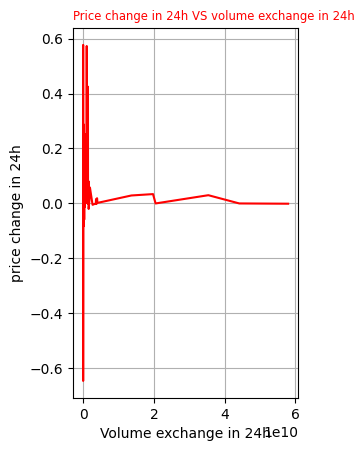

In [55]:
plt.Figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df['24h_volume'],df['24h'], color='red')
plt.xlabel('Volume exchange in 24h')
plt.ylabel('price change in 24h')
plt.title('Price change in 24h VS volume exchange in 24h', loc='left', fontsize='small', color='red')
plt.grid()

Here we can observe that the volume exchange which is near to zero has more fluctuation in price which is because of low liquidity.

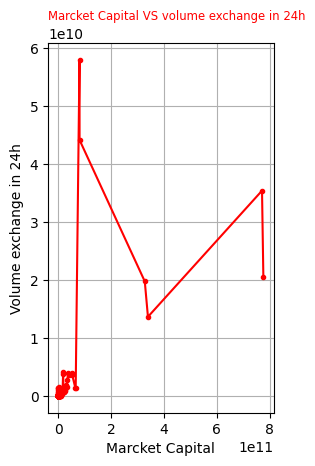

In [56]:
df = df.sort_values('mkt_cap')

plt.Figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df['mkt_cap'],df['24h_volume'], color='red', marker='.')
plt.ylabel('Volume exchange in 24h')
plt.xlabel('Marcket Capital')
plt.title('Marcket Capital VS volume exchange in 24h', loc='left', fontsize='small', color='red')
plt.grid()


In  this graph we can see that do has high volume exchange but very low capital which is leads to low liquidity and high risk of marcket stability.

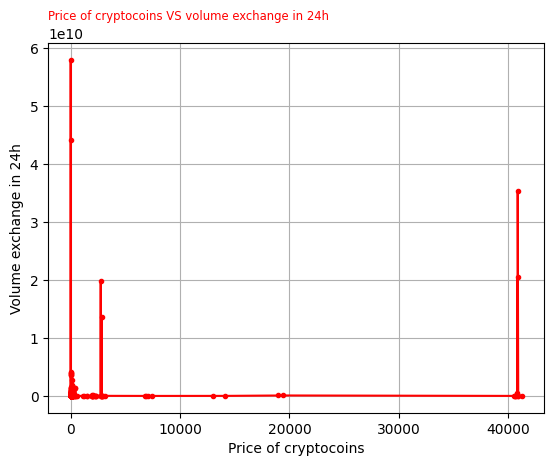

In [57]:
df = df.sort_values('price')

plt.Figure(figsize=(12,5))
plt.plot(df['price'],df['24h_volume'], color='red', marker='.')
plt.ylabel('Volume exchange in 24h')
plt.xlabel('Price of cryptocoins')
plt.title('Price of cryptocoins VS volume exchange in 24h', loc='left', fontsize='small', color='red')
plt.grid()

Here we can see that the cryptocoins whoes price is near to zero and has high volume exchange will be possible of low liquidity and high unstability in marcket.

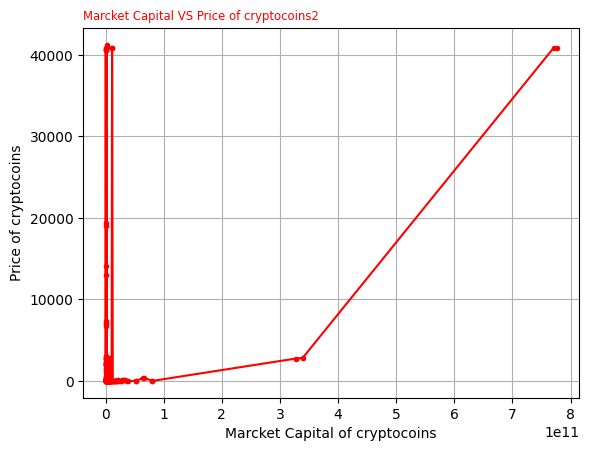

In [58]:
df = df.sort_values('mkt_cap')

plt.Figure(figsize=(12,5))
plt.plot(df['mkt_cap'],df['price'], color='red', marker='.')
plt.ylabel('Price of cryptocoins')
plt.xlabel('Marcket Capital of cryptocoins')
plt.title('Marcket Capital VS Price of cryptocoins2', loc='left', fontsize='small', color='red')
plt.grid()

Here, Some Cryprocoins has high price but the marcket capital is near to zero which indicates the low liquidity.

for multivarient analysis we will make graph of
- Marcket Capital VS 7d,24d,1h price change
- Price VS 7d,24d,1h price change

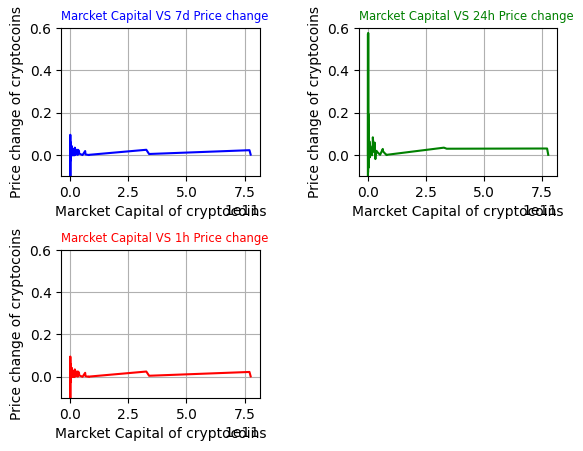

In [59]:
df = df.sort_values('mkt_cap')
plt.Figure(figsize=(12,5))

plt.subplot(2,2,1)
plt.plot(df['mkt_cap'],df['1h'], color='blue')
plt.ylabel('Price change of cryptocoins')
plt.xlabel('Marcket Capital of cryptocoins')
plt.ylim(-0.1, 0.6)
plt.title('Marcket Capital VS 7d Price change', loc='left', fontsize='small', color='blue')
plt.grid()

plt.subplot(2,2,2)
plt.plot(df['mkt_cap'],df['24h'], color='green')
plt.ylabel('Price change of cryptocoins')
plt.xlabel('Marcket Capital of cryptocoins')
plt.ylim(-0.1, 0.6)
plt.title('Marcket Capital VS 24h Price change', loc='left', fontsize='small', color='green')
plt.grid()

plt.subplot(2,2,3)
plt.plot(df['mkt_cap'],df['1h'], color='red')
plt.ylabel('Price change of cryptocoins')
plt.xlabel('Marcket Capital of cryptocoins')
plt.ylim(-0.1, 0.6)
plt.title('Marcket Capital VS 1h Price change', loc='left', fontsize='small', color='red')
plt.grid()

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Here, we can see that with low capital and high change in price leads to low liquidity and most of this type of graph get in 24h price change. so this feature is important to predict liquidity while 7d and 1h are not as much important

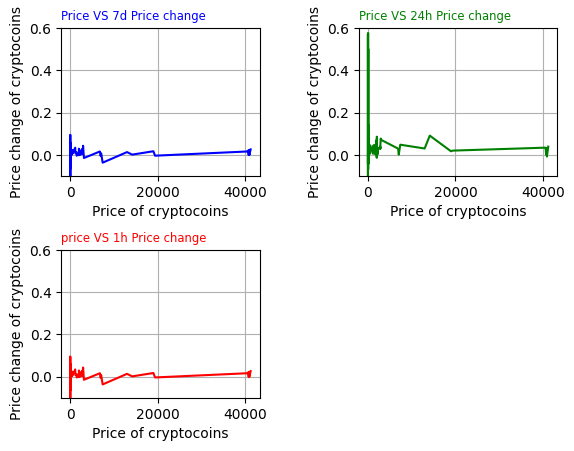

In [60]:
df = df.sort_values('price')
plt.Figure(figsize=(12,5))

plt.subplot(2,2,1)
plt.plot(df['price'],df['1h'], color='blue')
plt.ylabel('Price change of cryptocoins')
plt.xlabel('Price of cryptocoins')
plt.ylim(-0.1, 0.6)
plt.title('Price VS 7d Price change', loc='left', fontsize='small', color='blue')
plt.grid()

plt.subplot(2,2,2)
plt.plot(df['price'],df['24h'], color='green')
plt.ylabel('Price change of cryptocoins')
plt.xlabel('Price of cryptocoins')
plt.ylim(-0.1, 0.6)
plt.title('Price VS 24h Price change', loc='left', fontsize='small', color='green')
plt.grid()

plt.subplot(2,2,3)
plt.plot(df['price'],df['1h'], color='red')
plt.ylabel('Price change of cryptocoins')
plt.xlabel('Price of cryptocoins')
plt.ylim(-0.1, 0.6)
plt.title('price VS 1h Price change', loc='left', fontsize='small', color='red')
plt.grid()

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Here, we can see that with low price and high change in price leads to low liquidity and most of this type of graph get in 24h price change. so this feature is important to predict liquidity while 7d and 1h are not as much important

In [61]:
df.head()

,coin,price,1h,24h,7d,24h_volume,mkt_cap,date
829,Kishu Inu,1.484000e-09,-0.000,-0.039,0.073,5930373.0,143713655.0,2022-03-17
315,Kishu Inu,1.544000e-09,0.046,0.094,0.147,7104908.0,149823531.0,2022-03-16
656,Baby Doge Coin,2.830000e-09,0.004,-0.012,-0.071,9830393.0,449901755.0,2022-03-17
153,Baby Doge Coin,2.864000e-09,0.026,0.021,-0.039,10651029.0,452640717.0,2022-03-16
844,Bezoge Earth,2.984000e-09,-0.004,-0.022,-0.177,176270.0,130736810.0,2022-03-17


From EDA we can select the most important feature for liquidity predication which are:
- Marcket Capital of the cryptocoins
- Volume exchange in 24h of the cryptocoins
- Price of cryptocoins
- 24h Price Change of th ecryptocoins

To get low liquidity we need to select that crypto coins which has high price change in 24h with high volume exchange, low marcket capital and low Price.